In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/cardio_39.csv")

df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0   8463  19665       2     174    81.0    120     80            1     1   
1   6989  16052       2     169    65.0    110     80            1     1   
2  43332  18729       2     170    76.0    120     80            1     1   
3  77970  15757       1     170   110.0    150   1000            3     2   
4  61835  20594       1     152    54.0    120     90            1     1   

   smoke  alco  active  cardio  
0      0     0       1       1  
1      0     0       1       1  
2      0     0       1       1  
3      0     0       1       1  
4      0     0       0       1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57179 entries, 0 to 57178
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           57179 non-null  int64  
 1   age          57179 non-null  int64  
 2   gender       57179 non-null  int64  
 3   height       57179 non-null  int64  
 4   weight       57179 non-null  float64
 5   ap_hi        57179 non-null  int64  
 6   ap_lo        57179 non-null  int64  
 7   cholesterol  57179 non-null  int64  
 8   gluc         57179 non-null  int64  
 9   smoke        57179 non-null  int64  
 10  alco         57179 non-null  int64  
 11  active       57179 non-null  int64  
 12  cardio       57179 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 5.7 MB


0    34679
1    22500
Name: cardio, dtype: int64

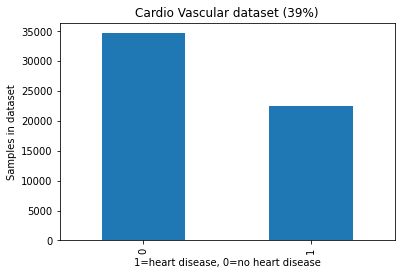

In [3]:
pd.value_counts(df['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (39%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df['cardio'].value_counts()

The balance ratio is (22500/57179=0,3935011) approximately 39%.

## Train/Test split 

The random_state is 42. 

In [4]:
# Importing the splitter, classification model, and the metric
from sklearn.model_selection import train_test_split
#Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['cardio']), df['cardio'], test_size = 0.2, stratify = df['cardio'], random_state = 42)

# Logistic Regression with raw dataset

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.71      0.87      0.79     27743
           1       0.71      0.46      0.56     18000

    accuracy                           0.71     45743
   macro avg       0.71      0.67      0.67     45743
weighted avg       0.71      0.71      0.70     45743

CPU times: user 796 ms, sys: 88.1 ms, total: 884 ms
Wall time: 636 ms


In [6]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78      6936
           1       0.69      0.46      0.55      4500

    accuracy                           0.71     11436
   macro avg       0.70      0.66      0.67     11436
weighted avg       0.70      0.71      0.69     11436



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.757


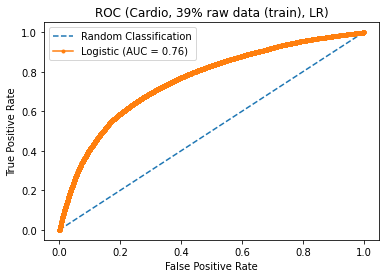

In [7]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 39% raw data (train), LR)')
# show the legend
pyplot.legend()
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.746


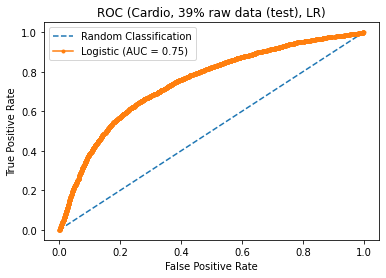

In [8]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 39% raw data (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with raw data

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81     27743
           1       0.74      0.58      0.65     18000

    accuracy                           0.75     45743
   macro avg       0.75      0.72      0.73     45743
weighted avg       0.75      0.75      0.75     45743



In [10]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      6936
           1       0.71      0.56      0.63      4500

    accuracy                           0.74     11436
   macro avg       0.73      0.71      0.71     11436
weighted avg       0.73      0.74      0.73     11436



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.796


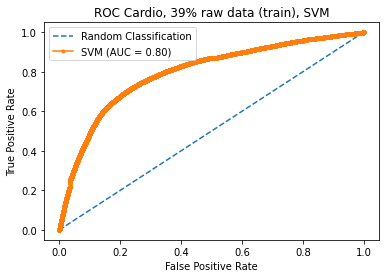

In [18]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 39% raw data (train), SVM')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.780


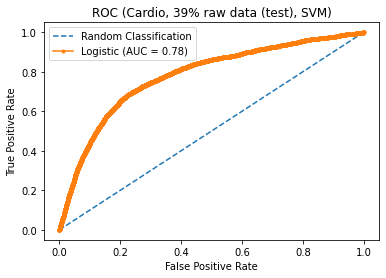

In [19]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 39% raw data (test), SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with raw data

In [13]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [14]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.24572	validation_0-logloss:0.66467	validation_1-error:0.25236	validation_1-logloss:0.66543
[1]	validation_0-error:0.24574	validation_0-logloss:0.64159	validation_1-error:0.25271	validation_1-logloss:0.64295
[2]	validation_0-error:0.24568	validation_0-logloss:0.62250	validation_1-error:0.25254	validation_1-logloss:0.62448
[3]	validation_0-error:0.24557	validation_0-logloss:0.60677	validation_1-error:0.25157	validation_1-logloss:0.60927
[4]	validation_0-error:0.24557	validation_0-logloss:0.59365	validation_1-error:0.25157	validation_1-logloss:0.59659
[5]	validation_0-error:0.24579	validation_0-logloss:0.58266	validation_1-error:0.25219	validation_1-logloss:0.58594
[6]	validation_0-error:0.24581	validation_0-logloss:0.57354	validation_1-error:0.25227	validation_1-logloss:0.57722
[7]	validation_0-error:0.24541	validation_0-logloss:0.56578	validation_1-error:0.25149	validation_1-logloss:0.56983
[8]	validation_0-error:0.24485	validation_0-logloss:0.55948	validation_1

[71]	validation_0-error:0.23929	validation_0-logloss:0.51089	validation_1-error:0.24799	validation_1-logloss:0.52723
[72]	validation_0-error:0.23934	validation_0-logloss:0.51081	validation_1-error:0.24825	validation_1-logloss:0.52730
[73]	validation_0-error:0.23921	validation_0-logloss:0.51068	validation_1-error:0.24869	validation_1-logloss:0.52731
[74]	validation_0-error:0.23923	validation_0-logloss:0.51056	validation_1-error:0.24886	validation_1-logloss:0.52730
[75]	validation_0-error:0.23916	validation_0-logloss:0.51038	validation_1-error:0.24913	validation_1-logloss:0.52729
[76]	validation_0-error:0.23901	validation_0-logloss:0.51023	validation_1-error:0.24886	validation_1-logloss:0.52733
[77]	validation_0-error:0.23892	validation_0-logloss:0.51015	validation_1-error:0.24904	validation_1-logloss:0.52730
[78]	validation_0-error:0.23890	validation_0-logloss:0.51007	validation_1-error:0.24869	validation_1-logloss:0.52731
[79]	validation_0-error:0.23888	validation_0-logloss:0.50997	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.77      0.87      0.81     27743
           1       0.74      0.60      0.66     18000

    accuracy                           0.76     45743
   macro avg       0.76      0.73      0.74     45743
weighted avg       0.76      0.76      0.75     45743



In [16]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      6936
           1       0.73      0.59      0.65      4500

    accuracy                           0.75     11436
   macro avg       0.75      0.72      0.73     11436
weighted avg       0.75      0.75      0.75     11436



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.814


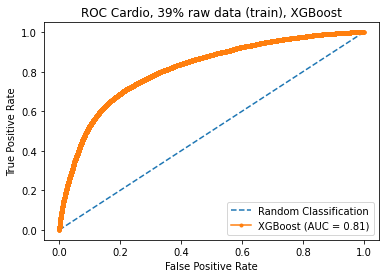

In [20]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 39% raw data (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.799


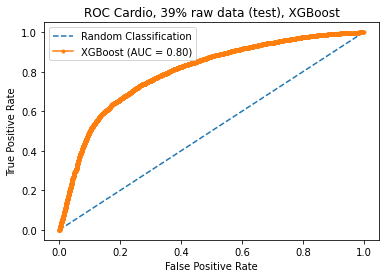

In [21]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 39% raw data (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Data augmentation

In the following part, the data gets perfectly balanced, by applying SMOTE, TVAE, and CTGAN to the raw dataset. The minority class is oversampled, by only creating samples with cardio=1. Afterwards, the machine learning algorithms run with the balaned datasets.



In [5]:
df_train = X_train
df_train['cardio'] = y_train

In [6]:
df_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
27914  16407  20476       2     169   109.0    125     80            1     2   
19872  85652  15340       1     156    52.0    140    100            1     1   
15557  33489  22122       1     160    61.0    120     80            1     1   
35696  38417  15168       1     169    62.0    120     60            1     1   
41467  55029  21227       1     162    65.0    110     70            1     1   

       smoke  alco  active  cardio  
27914      0     1       1       0  
19872      0     0       1       1  
15557      0     0       0       1  
35696      0     0       1       0  
41467      0     0       1       0

## SMOTE

1    27743
0    27743
Name: cardio, dtype: int64

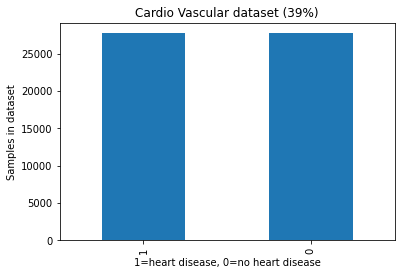

In [24]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df_train[['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']], df_train['cardio'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'])
df_oversampler_y = pd.DataFrame(y, columns = ['cardio'])
pd.value_counts(df_oversampler_y['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (39%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df_oversampler_y['cardio'].value_counts()

In [25]:
X_train = df_oversampler
y_train = df_oversampler_y

# Logistic Regression with data from SMOTE

In [26]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71     27743
           1       0.72      0.68      0.70     27743

    accuracy                           0.70     55486
   macro avg       0.70      0.70      0.70     55486
weighted avg       0.70      0.70      0.70     55486



In [27]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      6936
           1       0.60      0.65      0.63      4500

    accuracy                           0.70     11436
   macro avg       0.68      0.69      0.69     11436
weighted avg       0.70      0.70      0.70     11436



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.766


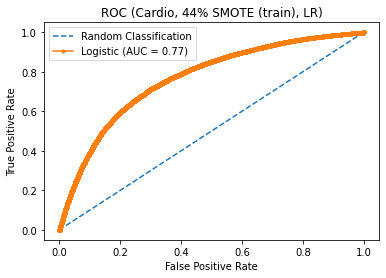

In [28]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 39% SMOTE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.747


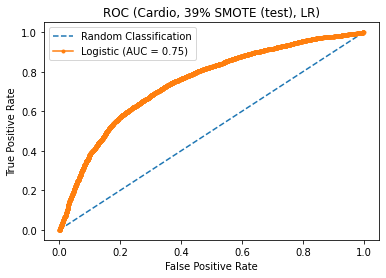

In [30]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 39% SMOTE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with data from SMOTE

In [31]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75     27743
           1       0.76      0.72      0.74     27743

    accuracy                           0.75     55486
   macro avg       0.75      0.75      0.75     55486
weighted avg       0.75      0.75      0.75     55486



In [32]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      6936
           1       0.64      0.68      0.66      4500

    accuracy                           0.72     11436
   macro avg       0.71      0.72      0.71     11436
weighted avg       0.73      0.72      0.73     11436



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.810


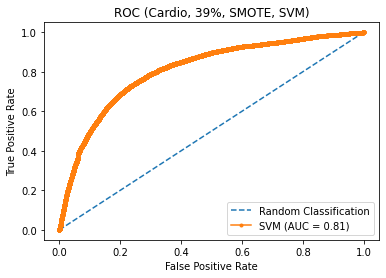

In [33]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 39%, SMOTE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.779


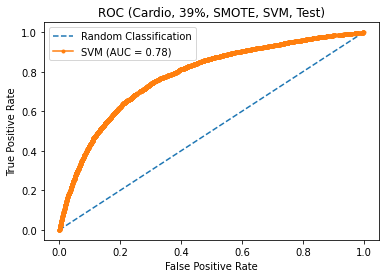

In [34]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 39%, SMOTE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with SMOTE data

In [35]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.24925	validation_0-logloss:0.66310	validation_1-error:0.25918	validation_1-logloss:0.66805
[1]	validation_0-error:0.24987	validation_0-logloss:0.63874	validation_1-error:0.25770	validation_1-logloss:0.64750
[2]	validation_0-error:0.24628	validation_0-logloss:0.61823	validation_1-error:0.25944	validation_1-logloss:0.63075
[3]	validation_0-error:0.24920	validation_0-logloss:0.60156	validation_1-error:0.25892	validation_1-logloss:0.61695
[4]	validation_0-error:0.24561	validation_0-logloss:0.58752	validation_1-error:0.25805	validation_1-logloss:0.60565
[5]	validation_0-error:0.24554	validation_0-logloss:0.57571	validation_1-error:0.25691	validation_1-logloss:0.59606
[6]	validation_0-error:0.24541	validation_0-logloss:0.56577	validation_1-error:0.25717	validation_1-logloss:0.58791
[7]	validation_0-error:0.24530	validation_0-logloss:0.55705	validation_1-error:0.25682	validation_1-logloss:0.58123
[8]	validation_0-error:0.24525	validation_0-logloss:0.54985	validation_1

[71]	validation_0-error:0.22242	validation_0-logloss:0.47787	validation_1-error:0.25805	validation_1-logloss:0.54055
[72]	validation_0-error:0.22243	validation_0-logloss:0.47766	validation_1-error:0.25822	validation_1-logloss:0.54056
[73]	validation_0-error:0.22231	validation_0-logloss:0.47744	validation_1-error:0.25831	validation_1-logloss:0.54051
[74]	validation_0-error:0.22220	validation_0-logloss:0.47719	validation_1-error:0.25866	validation_1-logloss:0.54049
CPU times: user 6.76 s, sys: 144 ms, total: 6.91 s
Wall time: 5.02 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79     27743
           1       0.80      0.74      0.77     27743

    accuracy                           0.78     55486
   macro avg       0.78      0.78      0.78     55486
weighted avg       0.78      0.78      0.78     55486



In [37]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      6936
           1       0.68      0.65      0.66      4500

    accuracy                           0.74     11436
   macro avg       0.73      0.72      0.73     11436
weighted avg       0.74      0.74      0.74     11436



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.851


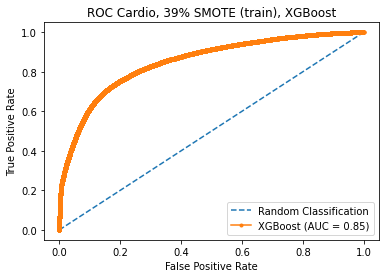

In [38]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 39% SMOTE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.793


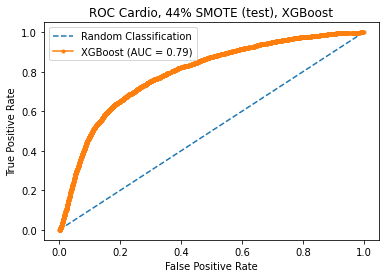

In [39]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 39% SMOTE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Data augmentation with TVAE

In [40]:
df_train['cardio'].value_counts()

0    27743
1    18000
Name: cardio, dtype: int64

In [41]:
from sdv.tabular import TVAE
tvae = TVAE()

tvae.fit(df_train)
# Once trained generate samples
samples = tvae.sample(15000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([df_train,samples])
tvae_result_df['cardio'].value_counts()

0    27743
1    19291
Name: cardio, dtype: int64

In [42]:
from sdv.tabular import TVAE
tvae = TVAE()

tvae.fit(tvae_result_df)
# Once trained generate samples
samples = tvae.sample(19000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df1 = pd.concat([tvae_result_df,samples])
tvae_result_df1['cardio'].value_counts()

0    27743
1    21068
Name: cardio, dtype: int64

In [43]:
tvae = TVAE()

tvae.fit(tvae_result_df1)
# Once trained generate samples
samples = tvae.sample(21000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df2 = pd.concat([tvae_result_df1,samples])
tvae_result_df2['cardio'].value_counts()

1    29749
0    27743
Name: cardio, dtype: int64

In [44]:
tvae_result_df_1 = tvae_result_df2[tvae_result_df2['cardio'] == 1]
tvae_result_df_1['cardio'].value_counts()

1    29749
Name: cardio, dtype: int64

In [45]:
tvae_result_df_0 = tvae_result_df2[tvae_result_df2['cardio'] == 0]
tvae_result_df_0['cardio'].value_counts()

0    27743
Name: cardio, dtype: int64

In [46]:
train_df_1_bal = tvae_result_df_1.sample(n = 27743)
train_df_balanced = train_df_1_bal.append(tvae_result_df_0)

1    27743
0    27743
Name: cardio, dtype: int64

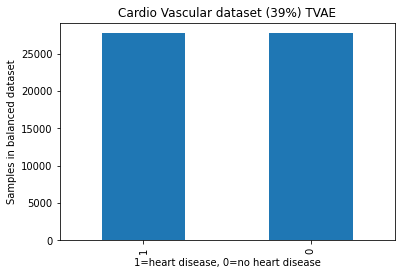

In [47]:
pd.value_counts(train_df_balanced['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (39%) TVAE')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in balanced dataset')
train_df_balanced['cardio'].value_counts()

In [48]:
X_train = train_df_balanced.drop(['cardio'], axis=1)
y_train = train_df_balanced['cardio']

### Logistic Regression with TVAE Data

In [49]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72     27743
           1       0.73      0.65      0.69     27743

    accuracy                           0.71     55486
   macro avg       0.71      0.71      0.71     55486
weighted avg       0.71      0.71      0.71     55486



In [50]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      6936
           1       0.63      0.64      0.63      4500

    accuracy                           0.71     11436
   macro avg       0.70      0.70      0.70     11436
weighted avg       0.71      0.71      0.71     11436



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.752


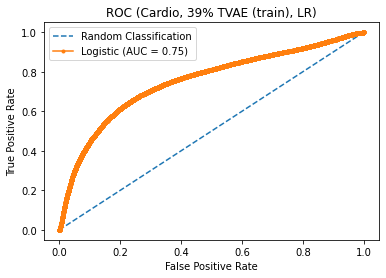

In [51]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 39% TVAE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.748


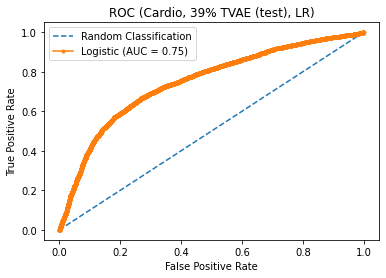

In [52]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 39% TVAE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### SVM with TVAE data

In [53]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81     27743
           1       0.84      0.73      0.78     27743

    accuracy                           0.80     55486
   macro avg       0.80      0.80      0.79     55486
weighted avg       0.80      0.80      0.79     55486



In [54]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      6936
           1       0.71      0.57      0.63      4500

    accuracy                           0.74     11436
   macro avg       0.73      0.71      0.71     11436
weighted avg       0.73      0.74      0.73     11436



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.862


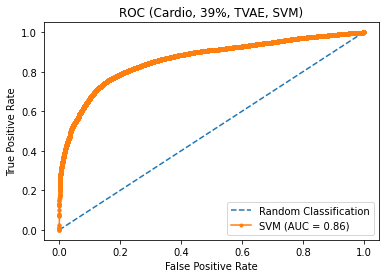

In [55]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 39%, TVAE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.778


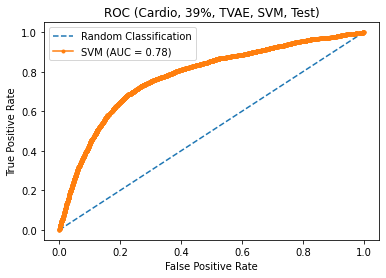

In [56]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 39%, TVAE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with TVAE data

In [57]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.22451	validation_0-logloss:0.65866	validation_1-error:0.27055	validation_1-logloss:0.67060
[1]	validation_0-error:0.21688	validation_0-logloss:0.62960	validation_1-error:0.26976	validation_1-logloss:0.65045
[2]	validation_0-error:0.21822	validation_0-logloss:0.60596	validation_1-error:0.27011	validation_1-logloss:0.63475
[3]	validation_0-error:0.21688	validation_0-logloss:0.58554	validation_1-error:0.26976	validation_1-logloss:0.62113
[4]	validation_0-error:0.21550	validation_0-logloss:0.56861	validation_1-error:0.26653	validation_1-logloss:0.60998
[5]	validation_0-error:0.21548	validation_0-logloss:0.55372	validation_1-error:0.26644	validation_1-logloss:0.60041
[6]	validation_0-error:0.21108	validation_0-logloss:0.54000	validation_1-error:0.25971	validation_1-logloss:0.59124
[7]	validation_0-error:0.20665	validation_0-logloss:0.52828	validation_1-error:0.25936	validation_1-logloss:0.58417
[8]	validation_0-error:0.20558	validation_0-logloss:0.51859	validation_1

[71]	validation_0-error:0.19636	validation_0-logloss:0.42436	validation_1-error:0.24921	validation_1-logloss:0.53028
[72]	validation_0-error:0.19616	validation_0-logloss:0.42393	validation_1-error:0.24948	validation_1-logloss:0.53004
[73]	validation_0-error:0.19603	validation_0-logloss:0.42370	validation_1-error:0.24982	validation_1-logloss:0.53001
[74]	validation_0-error:0.19590	validation_0-logloss:0.42346	validation_1-error:0.24982	validation_1-logloss:0.52992
[75]	validation_0-error:0.19592	validation_0-logloss:0.42338	validation_1-error:0.24982	validation_1-logloss:0.52996
[76]	validation_0-error:0.19578	validation_0-logloss:0.42324	validation_1-error:0.24956	validation_1-logloss:0.52994
[77]	validation_0-error:0.19581	validation_0-logloss:0.42317	validation_1-error:0.24930	validation_1-logloss:0.52992
[78]	validation_0-error:0.19574	validation_0-logloss:0.42289	validation_1-error:0.24921	validation_1-logloss:0.52983
[79]	validation_0-error:0.19574	validation_0-logloss:0.42281	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82     27743
           1       0.85      0.74      0.79     27743

    accuracy                           0.81     55486
   macro avg       0.81      0.81      0.81     55486
weighted avg       0.81      0.81      0.81     55486



In [59]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      6936
           1       0.73      0.58      0.65      4500

    accuracy                           0.75     11436
   macro avg       0.75      0.72      0.73     11436
weighted avg       0.75      0.75      0.75     11436



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.883


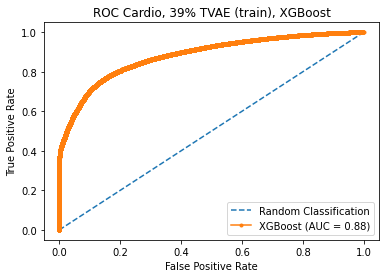

In [60]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 39% TVAE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.797


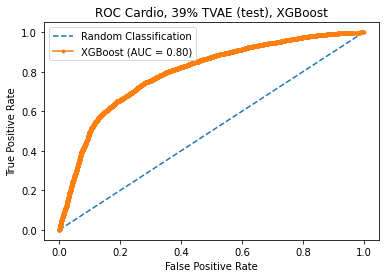

In [61]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 39% TVAE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# CTGAN to balance the training dataframe

In [7]:
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer()

ctgan.fit(df_train, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(5000)
samples = samples[samples['cardio'] ==1.0]
samples['cardio'].value_counts()

1    1795
Name: cardio, dtype: int64

In [8]:
df_train['cardio'].value_counts()

0    27743
1    18000
Name: cardio, dtype: int64

In [9]:
df_train_samples = df_train.append(samples)

In [10]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_samples, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples1 = ctgan.sample(10000)

In [11]:
samples1 = samples1[samples1['cardio'] ==1.0]
samples1['cardio'].value_counts()

1    3241
Name: cardio, dtype: int64

In [12]:
df_train_samples = df_train_samples.append(samples1)

In [13]:
df_train_samples['cardio'].value_counts()

0    27743
1    23036
Name: cardio, dtype: int64

In [15]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_samples, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples2 = ctgan.sample(12000)
samples2 = samples2[samples2['cardio'] ==1.0]
samples2['cardio'].value_counts()

1    5299
Name: cardio, dtype: int64

In [16]:
df_train_samples = df_train_samples.append(samples2)

In [18]:
df_train_samples['cardio'].value_counts()

1    28335
0    27743
Name: cardio, dtype: int64

In [19]:
samples1 = df_train_samples[df_train_samples['cardio'] ==1.0]

In [20]:
samples1_balanced = samples1.sample(n = 27743)
samples0 = df_train[df_train['cardio'] ==0.0]
df_train_balanced = samples0.append(samples1_balanced)
df_train_balanced['cardio'].value_counts()

1    27743
0    27743
Name: cardio, dtype: int64

In [21]:
X_train = df_train_balanced.drop(['cardio'], axis=1)
y_train = df_train_balanced['cardio']

# Logistic Regression with CTGAN data

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71     27743
           1       0.71      0.66      0.68     27743

    accuracy                           0.69     55486
   macro avg       0.70      0.69      0.69     55486
weighted avg       0.70      0.69      0.69     55486



In [23]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74      6936
           1       0.61      0.67      0.63      4500

    accuracy                           0.70     11436
   macro avg       0.69      0.69      0.69     11436
weighted avg       0.70      0.70      0.70     11436



In [24]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.751


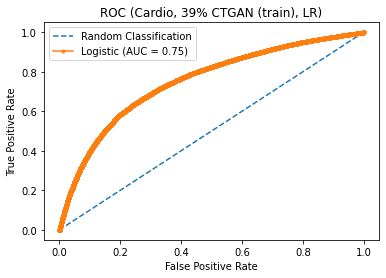

In [25]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 39% CTGAN (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.751


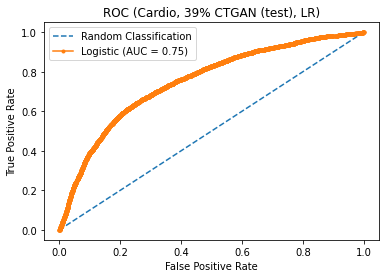

In [26]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 39% CTGAN (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with CTGAN data

In [27]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74     27743
           1       0.76      0.69      0.72     27743

    accuracy                           0.73     55486
   macro avg       0.74      0.73      0.73     55486
weighted avg       0.74      0.73      0.73     55486



In [28]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      6936
           1       0.65      0.67      0.66      4500

    accuracy                           0.73     11436
   macro avg       0.72      0.72      0.72     11436
weighted avg       0.73      0.73      0.73     11436



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.797


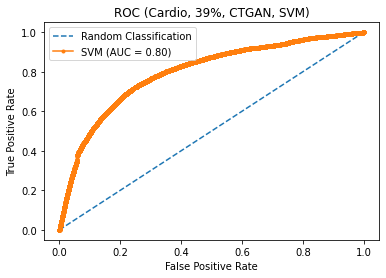

In [29]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 39%, CTGAN, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.773


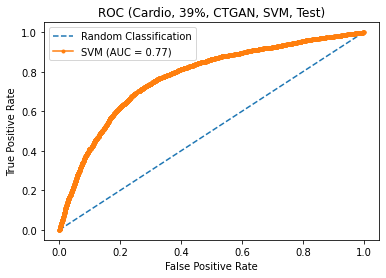

In [30]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 39%, CTGAN, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost for CTGAN data

In [31]:
model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.25129	validation_0-logloss:0.66462	validation_1-error:0.26076	validation_1-logloss:0.66913
[1]	validation_0-error:0.25129	validation_0-logloss:0.64130	validation_1-error:0.26076	validation_1-logloss:0.64952
[2]	validation_0-error:0.25048	validation_0-logloss:0.62197	validation_1-error:0.25962	validation_1-logloss:0.63342
[3]	validation_0-error:0.25050	validation_0-logloss:0.60593	validation_1-error:0.25953	validation_1-logloss:0.61998
[4]	validation_0-error:0.24941	validation_0-logloss:0.59255	validation_1-error:0.25857	validation_1-logloss:0.60878
[5]	validation_0-error:0.24873	validation_0-logloss:0.58132	validation_1-error:0.25761	validation_1-logloss:0.59957
[6]	validation_0-error:0.24871	validation_0-logloss:0.57186	validation_1-error:0.25761	validation_1-logloss:0.59157
[7]	validation_0-error:0.24655	validation_0-logloss:0.56115	validation_1-error:0.25682	validation_1-logloss:0.58465
[8]	validation_0-error:0.24613	validation_0-logloss:0.55363	validation_1

[71]	validation_0-error:0.21049	validation_0-logloss:0.46357	validation_1-error:0.25612	validation_1-logloss:0.54051
[72]	validation_0-error:0.21045	validation_0-logloss:0.46343	validation_1-error:0.25612	validation_1-logloss:0.54045
[73]	validation_0-error:0.21030	validation_0-logloss:0.46303	validation_1-error:0.25630	validation_1-logloss:0.54046


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80     27743
           1       0.82      0.74      0.78     27743

    accuracy                           0.79     55486
   macro avg       0.79      0.79      0.79     55486
weighted avg       0.79      0.79      0.79     55486



In [33]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80      6936
           1       0.70      0.60      0.65      4500

    accuracy                           0.74     11436
   macro avg       0.73      0.72      0.72     11436
weighted avg       0.74      0.74      0.74     11436



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.860


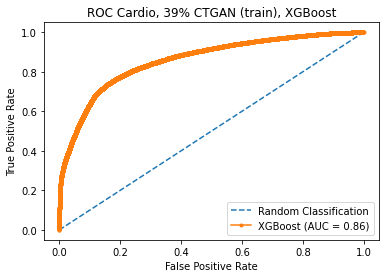

In [34]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 39% CTGAN (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.790


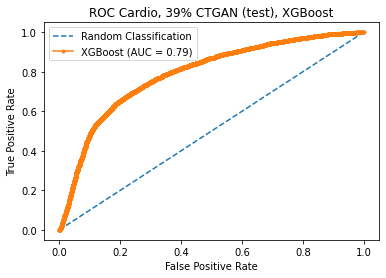

In [35]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 39% CTGAN (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()